In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=02add8c627a827011bb15b73f40d7be7b3319f98e2e0834740b4f7d8e294d058
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


**Topic: Rainfall Prediction Based on Fuzzy Logic**\
This notebook present the prediction system implemented with Fuzzy Logic to predict rainfall amount based on wind speed (m/s) and temperature (Degr. Celsius)\
Reference source: Janarthanan, R., Balamurali, R., Annapoorani, A., & Vimala, V. (2021). Prediction of rainfall using fuzzy logic. Materials Today: Proceedings, 37, 959-963.

In [ ]:
# Import necessary libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

**Categories Normalization Function**

In [ ]:
# Normalization function
# Parameters: Category 1's max/min: maxcat1, mincat1
#             Category 2's max/min: maxcat2, mincat2
#             Input value of Cat.1: in_val
# Outputs: Value of category 2: out_val
def normalizeCategory(mincat1, maxcat1, mincat2, maxcat2, in_val):
  # Normalize category
  out_val = ((in_val - mincat1)/(maxcat1 - mincat1))*(maxcat2 - mincat2) + mincat2
  return out_val

**Ranges Mid-point Finding Function**

In [ ]:
# Function to calculate mid-point of ranges
# Parameters: Start point: start_point
#             End point:   end_point
# Output: mid_point
def midPointComputing(start_point, end_point):
  # Mid-point computation
  mid_point = start_point + (end_point - start_point)/2
  return mid_point

In [ ]:
# List of basic fuzzy values
fuzz_lst = [0, 0.25, 0.5, 0.75, 1]

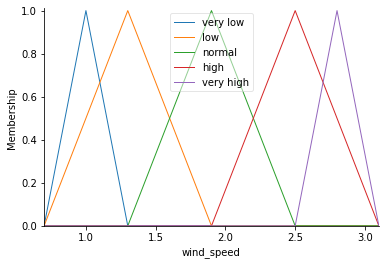

In [ ]:
# Generate categories - windspeed
wind_speed = ctrl.Antecedent(np.arange(0.7, 3.1, 0.1), 'wind_speed')

# We first need the normalization from basic values to category values - The wind speed
wind_speed_lst = []
for val in fuzz_lst:
  wind_speed_lst.append(normalizeCategory(0, 1, 0.7, 3.1, val))

# Then, use them to set ranges for the fuzzy variable
wind_speed['very low']  = fuzz.trimf(wind_speed.universe, [wind_speed_lst[0], midPointComputing(wind_speed_lst[0], wind_speed_lst[1]),
                                                          wind_speed_lst[1]])
wind_speed['low']       = fuzz.trimf(wind_speed.universe, [wind_speed_lst[0], midPointComputing(wind_speed_lst[0], wind_speed_lst[2]),
                                                          wind_speed_lst[2]])
wind_speed['normal']    = fuzz.trimf(wind_speed.universe, [wind_speed_lst[1], midPointComputing(wind_speed_lst[1], wind_speed_lst[3]),
                                                          wind_speed_lst[3]])
wind_speed['high']      = fuzz.trimf(wind_speed.universe, [wind_speed_lst[2], midPointComputing(wind_speed_lst[2], wind_speed_lst[4]),
                                                          wind_speed_lst[4]])
wind_speed['very high'] = fuzz.trimf(wind_speed.universe, [wind_speed_lst[3], midPointComputing(wind_speed_lst[3], wind_speed_lst[4]),
                                                          wind_speed_lst[4]])

# Visualization
wind_speed.view()

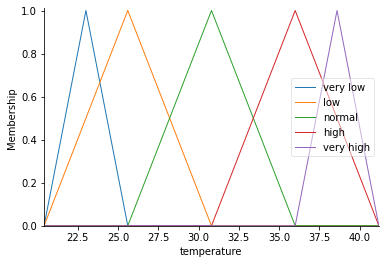

In [ ]:
# Generate categories - Temperature (in Degr. Celsius)
temperature = ctrl.Antecedent(np.arange(20.4, 41.2, 0.2), 'temperature')

# We first need the normalization from basic values to category values - The Temperature
temperature_lst = []
for val1 in fuzz_lst:
  temperature_lst.append(normalizeCategory(0, 1, 20.4, 41.2, val1))

# Then, use them to set ranges for the fuzzy variable
temperature['very low']  = fuzz.trimf(temperature.universe, [temperature_lst[0], midPointComputing(temperature_lst[0], temperature_lst[1]),
                                                           temperature_lst[1]])
temperature['low']       = fuzz.trimf(temperature.universe, [temperature_lst[0], midPointComputing(temperature_lst[0], temperature_lst[2]),
                                                      temperature_lst[2]])
temperature['normal']    = fuzz.trimf(temperature.universe, [temperature_lst[1], midPointComputing(temperature_lst[1], temperature_lst[3]),
                                                         temperature_lst[3]])
temperature['high']      = fuzz.trimf(temperature.universe, [temperature_lst[2], midPointComputing(temperature_lst[2], temperature_lst[4]),
                                                       temperature_lst[4]])
temperature['very high'] = fuzz.trimf(temperature.universe, [temperature_lst[3], midPointComputing(temperature_lst[3], temperature_lst[4]),
                                                            temperature_lst[4]])

# Visualization
temperature.view()

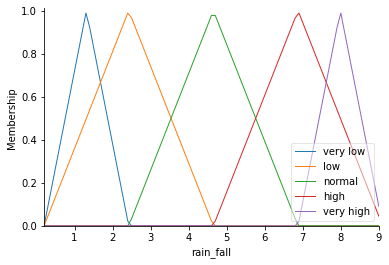

In [ ]:
# Generate data - Rainfall
rain_fall = ctrl.Consequent(np.arange(0.2, 9.1, 0.1), 'rain_fall')

# We first need the normalization from basic values to category values - The Rainfall
rain_fall_lst = []
for val2 in fuzz_lst:
  rain_fall_lst.append(normalizeCategory(0, 1, 0.2, 9.1, val2))

# Then, use them to set ranges for the fuzzy variable
rain_fall['very low']  = fuzz.trimf(rain_fall.universe, [rain_fall_lst[0], midPointComputing(rain_fall_lst[0], rain_fall_lst[1]),
                                                        rain_fall_lst[1]])
rain_fall['low']       = fuzz.trimf(rain_fall.universe, [rain_fall_lst[0], midPointComputing(rain_fall_lst[0], rain_fall_lst[2]),
                                                        rain_fall_lst[2]])
rain_fall['normal']    = fuzz.trimf(rain_fall.universe, [rain_fall_lst[1], midPointComputing(rain_fall_lst[1], rain_fall_lst[3]),
                                                        rain_fall_lst[3]])
rain_fall['high']      = fuzz.trimf(rain_fall.universe, [rain_fall_lst[2], midPointComputing(rain_fall_lst[2], rain_fall_lst[4]),
                                                    rain_fall_lst[4]])
rain_fall['very high'] = fuzz.trimf(rain_fall.universe, [rain_fall_lst[3], midPointComputing(rain_fall_lst[3], rain_fall_lst[4]),
                                                        rain_fall_lst[4]])

# Visualization
rain_fall.view()

In [ ]:
# Rules
    # Set 1: Vary windspeed with very low temperature
rule_1 = ctrl.Rule(wind_speed['very low'] & temperature['very low'], rain_fall['very low'])
rule_2 = ctrl.Rule(wind_speed['low'] & temperature['very low'], rain_fall['very low'])
rule_3 = ctrl.Rule(wind_speed['normal'] & temperature['very low'], rain_fall['normal'])
rule_4 = ctrl.Rule(wind_speed['high'] & temperature['very low'], rain_fall['very high'])
rule_5 = ctrl.Rule(wind_speed['very high'] & temperature['very low'], rain_fall['very high'])

    # Set 2: Vary windspeed with low temperature
rule_6  = ctrl.Rule(wind_speed['very low'] & temperature['low'], rain_fall['very low'])
rule_7  = ctrl.Rule(wind_speed['low'] & temperature['low'], rain_fall['very low'])
rule_8  = ctrl.Rule(wind_speed['normal'] & temperature['low'], rain_fall['low'])
rule_9  = ctrl.Rule(wind_speed['high'] & temperature['low'], rain_fall['high'])
rule_10 = ctrl.Rule(wind_speed['very high'] & temperature['low'], rain_fall['very high'])

    # Set 3: Vary windspeed with normal temperature
rule_11 = ctrl.Rule(wind_speed['very low'] & temperature['normal'], rain_fall['very low'])
rule_12 = ctrl.Rule(wind_speed['low'] & temperature['normal'], rain_fall['very low'])
rule_13 = ctrl.Rule(wind_speed['normal'] & temperature['normal'], rain_fall['low'])
rule_14 = ctrl.Rule(wind_speed['high'] & temperature['normal'], rain_fall['high'])
rule_15 = ctrl.Rule(wind_speed['very high'] & temperature['normal'], rain_fall['normal'])

    # Set 4: Vary windspeed with high temperature
rule_16 = ctrl.Rule(wind_speed['very low'] & temperature['high'], rain_fall['very low'])
rule_17 = ctrl.Rule(wind_speed['low'] & temperature['high'], rain_fall['very low'])
rule_18 = ctrl.Rule(wind_speed['normal'] & temperature['high'], rain_fall['low'])
rule_19 = ctrl.Rule(wind_speed['high'] & temperature['high'], rain_fall['normal'])
rule_20 = ctrl.Rule(wind_speed['very high'] & temperature['high'], rain_fall['high'])

    # Set 4: Vary windspeed with very high temperature
rule_21 = ctrl.Rule(wind_speed['very low'] & temperature['very high'], rain_fall['very low'])
rule_22 = ctrl.Rule(wind_speed['low'] & temperature['very high'], rain_fall['very low'])
rule_23 = ctrl.Rule(wind_speed['normal'] & temperature['very high'], rain_fall['very low'])
rule_24 = ctrl.Rule(wind_speed['high'] & temperature['very high'], rain_fall['high'])
rule_25 = ctrl.Rule(wind_speed['very high'] & temperature['very high'], rain_fall['high'])

In [ ]:
# Train and Create a predictor
rainfall_predictor = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5,
                                        rule_6, rule_7, rule_8, rule_9, rule_10,
                                        rule_11, rule_12, rule_13, rule_14, rule_15,
                                        rule_16, rule_17, rule_18, rule_19, rule_20,
                                        rule_21, rule_22, rule_23, rule_24, rule_25,
                                        ])
rainfall_pred = ctrl.ControlSystemSimulation(rainfall_predictor)

Predicted: 72.16447395202063 mm


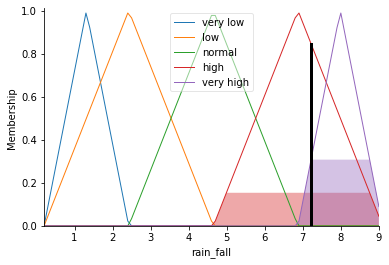

In [ ]:
# Test an instance
rainfall_pred.input['wind_speed']  = 3.0    # About 3.0 m/s
rainfall_pred.input['temperature'] = 21.2   # About 21.2 degree Celsius
rainfall_pred.compute()

# Print
rain_pred = rainfall_pred.output['rain_fall']*10
dis_str = "Predicted: {rainfall} mm".format(rainfall =rain_pred)   # Print predicted value
print(dis_str)
rain_fall.view(sim = rainfall_pred)   # Display on graph

Predicted: 21.09920938913333 mm


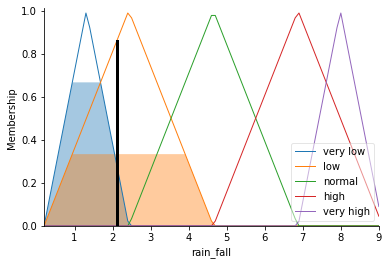

In [ ]:
# Test an instance
rainfall_pred.input['wind_speed']  = 1.5   # About 3.0 m/s
rainfall_pred.input['temperature'] = 30.5  # About 30.5 degree Celsius
rainfall_pred.compute()

# Print
rain_pred = rainfall_pred.output['rain_fall']*10
dis_str = "Predicted: {rainfall} mm".format(rainfall =rain_pred)   # Print predicted value
print(dis_str)
rain_fall.view(sim = rainfall_pred)   # Display on graph